In [1]:
import os, sys
path = os.path.abspath(os.path.join('..'))
os.chdir(path)
if path not in sys.path:
    sys.path.append(path)

In [2]:
import matplotlib.pyplot as plt
import niceplots
plt.style.use(niceplots.get_style())

from pathlib import Path
from optim import TopOpt, Post2D

ANSYS_path = Path("mapdl")
res_dir    = Path("results/mbb/")
mod_dir    = Path("models/")
TopOpt.set_paths(ANSYS_path, res_dir, mod_dir)

# Test case
- Half MBB 168 mm x 80 mm x 8 mm
- Mesh: 42 x 20 elements (4 mm element)
- 1 kN downward force


- Cellulose and 0.5 bamboo
- volfrac = 0.3
- r_rho = 8
- r_theta = 20
- theta0 = -30°
- 40 iterations

In [3]:
# {t/mm^3, MPa, -, kgCO2/kg}
bamboo     = {'rho': 700e-12, 'E': 17.5e3, 'v': 0.04, 'CO2': 1.0565}
cellulose  = {'rho': 990e-12, 'E': 3.25e3, 'v': 0.355, 'CO2': 3.8}
Vfiber  = 0.5

Ex, Ey, nuxy, nuyz, Gxy, rho, CO2mat = TopOpt.rule_mixtures(fiber=bamboo, matrix=cellulose, Vfiber=Vfiber)
CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg

In [4]:
fea_fun, meshdata_fun = TopOpt.mbb2d(nelx=42, nely=20, elsize=4, elthk=8,Ex=Ex,Ey=Ey,nuxy=nuxy,Gxy=Gxy,force=-1000)
solver1 = TopOpt(dim='2D', jobname='python', fea_fun=fea_fun, meshdata_fun=meshdata_fun)
solver1.set_material(Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuxy, Gxy=Gxy)
solver1.set_volfrac(0.3)
solver1.set_filters(r_rho=8, r_theta=20)
solver1.set_initial_conditions('fix', theta0=-30)
solver1.set_optim_options(max_iter=40)

solver1.run()
solver1.save()
solver1.print_timing()

Iteration   0...  c_1 = 34856.4882, 
Iteration   1...  c_1 = 13729.5917, 
Iteration   2...  c_1 =  8509.6221, 
Iteration   3...  c_1 =  6929.0092, 
Iteration   4...  c_1 =  4706.1841, 
Iteration   5...  c_1 =  4817.4638, 
Iteration   6...  c_1 =  4069.1797, 
Iteration   7...  c_1 =  4183.9886, 
Iteration   8...  c_1 =  4199.8838, 
Iteration   9...  c_1 =  4328.9247, 
Iteration  10...  c_1 =  4279.9052, 
Iteration  11...  c_1 =  4273.9705, 
Iteration  12...  c_1 =  4319.7836, 
Iteration  13...  c_1 =  4292.4746, 
Iteration  14...  c_1 =  4308.7254, 
Iteration  15...  c_1 =  4267.3179, 
Iteration  16...  c_1 =  4244.0463, 
Iteration  17...  c_1 =  4234.3529, 
Iteration  18...  c_1 =  4144.4840, 
Iteration  19...  c_1 =  4092.9940, 
Iteration  20...  c_1 =  3989.1149, 
Iteration  21...  c_1 =  3958.8532, 
Iteration  22...  c_1 =  3830.0315, 
Iteration  23...  c_1 =  3825.2951, 
Iteration  24...  c_1 =  3726.2344, 
Iteration  25...  c_1 =  3703.7309, 
Iteration  26...  c_1 =  3665.8341, 
I

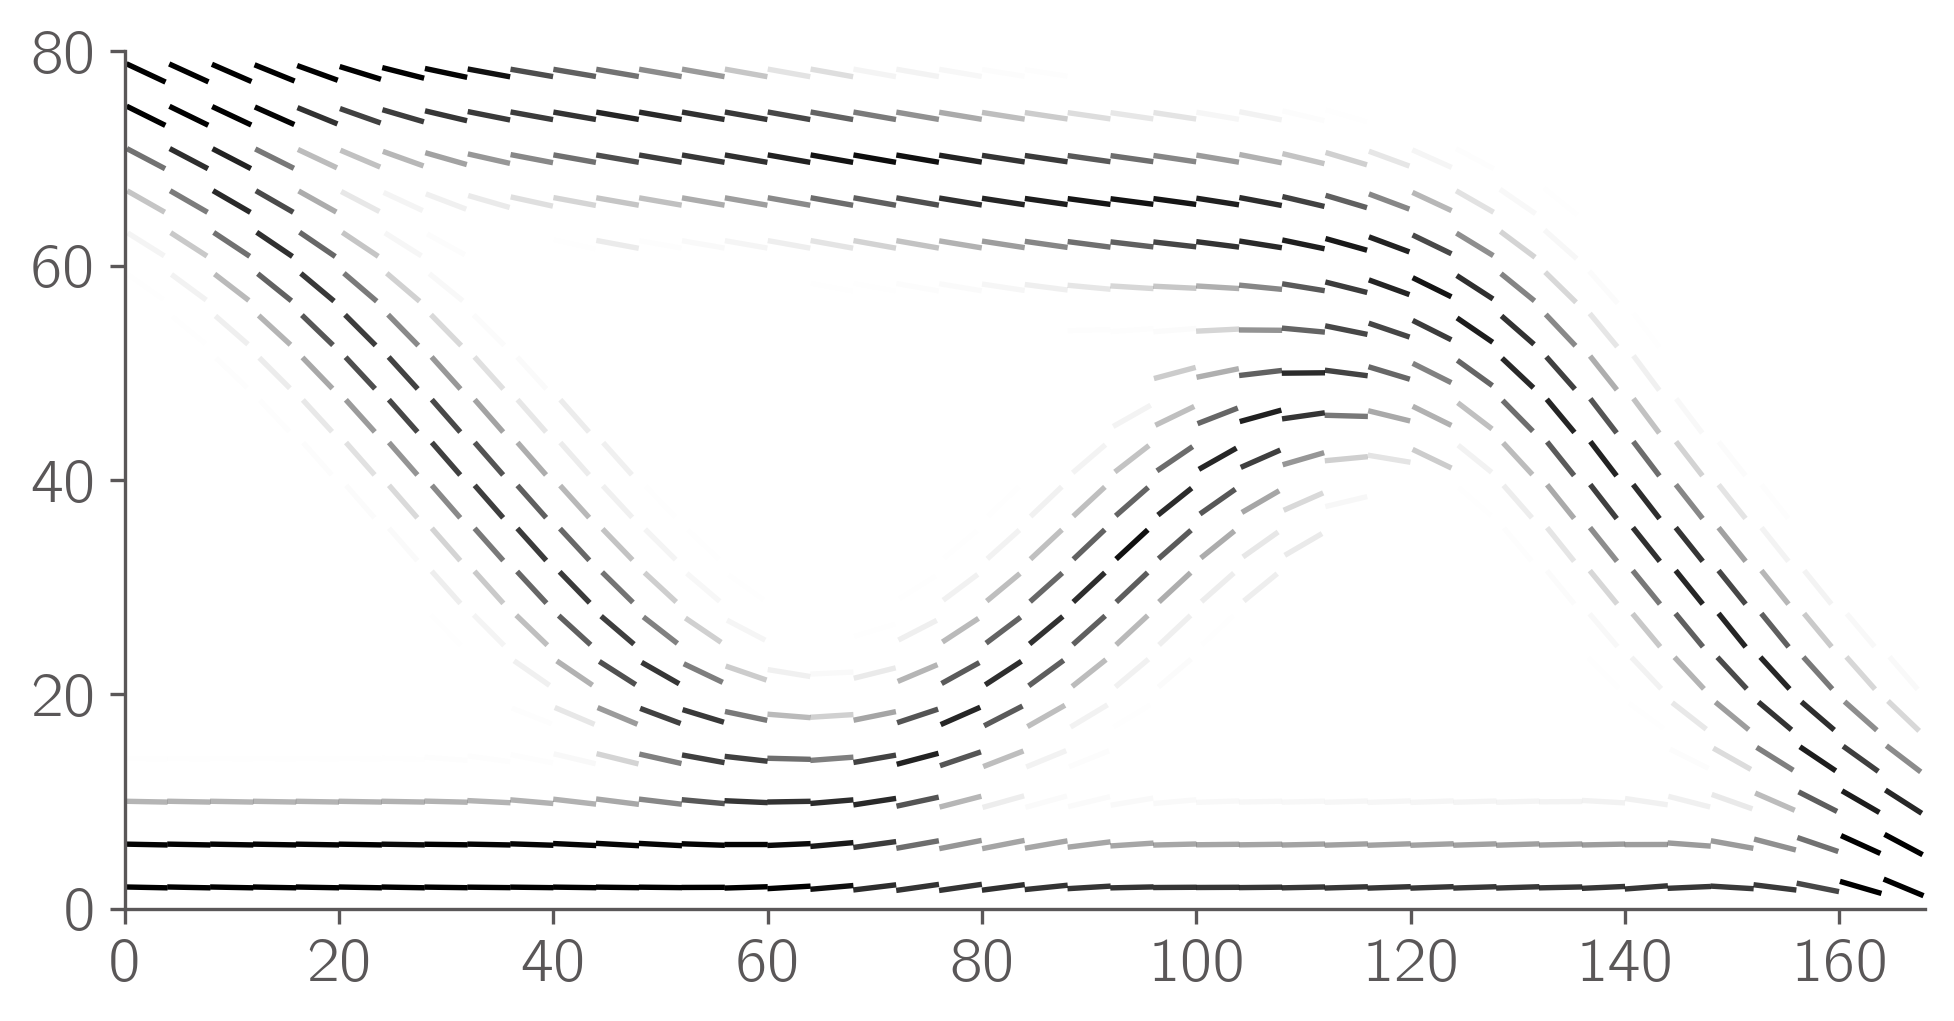

In [5]:
post1 = Post2D(solver1)
post1.plot()

In [6]:
solver2 = TopOpt(inputfiles='mbb2d', dim='2D', jobname='ansys')
solver2.set_material(Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuxy, Gxy=Gxy)
solver2.set_volfrac(0.3)
solver2.set_filters(r_rho=8, r_theta=20)
solver2.set_initial_conditions('fix', theta0=-30)
solver2.set_optim_options(max_iter=40)

solver2.run()
solver2.save()
solver2.print_timing()

Iteration   0...  c_1 = 34856.4883, 
Iteration   1...  c_1 = 13777.8591, 
Iteration   2...  c_1 =  8531.7460, 
Iteration   3...  c_1 =  6937.9121, 
Iteration   4...  c_1 =  4712.1008, 
Iteration   5...  c_1 =  4810.8914, 
Iteration   6...  c_1 =  4076.4669, 
Iteration   7...  c_1 =  4192.7834, 
Iteration   8...  c_1 =  4204.2495, 
Iteration   9...  c_1 =  4331.5170, 
Iteration  10...  c_1 =  4282.4371, 
Iteration  11...  c_1 =  4283.7561, 
Iteration  12...  c_1 =  4329.4232, 
Iteration  13...  c_1 =  4295.4878, 
Iteration  14...  c_1 =  4315.6366, 
Iteration  15...  c_1 =  4273.3752, 
Iteration  16...  c_1 =  4255.1316, 
Iteration  17...  c_1 =  4231.3867, 
Iteration  18...  c_1 =  4139.1204, 
Iteration  19...  c_1 =  4084.9536, 
Iteration  20...  c_1 =  3974.6505, 
Iteration  21...  c_1 =  3945.8625, 
Iteration  22...  c_1 =  3797.2509, 
Iteration  23...  c_1 =  3824.7995, 
Iteration  24...  c_1 =  3666.1733, 
Iteration  25...  c_1 =  3707.2334, 
Iteration  26...  c_1 =  3668.3446, 
I

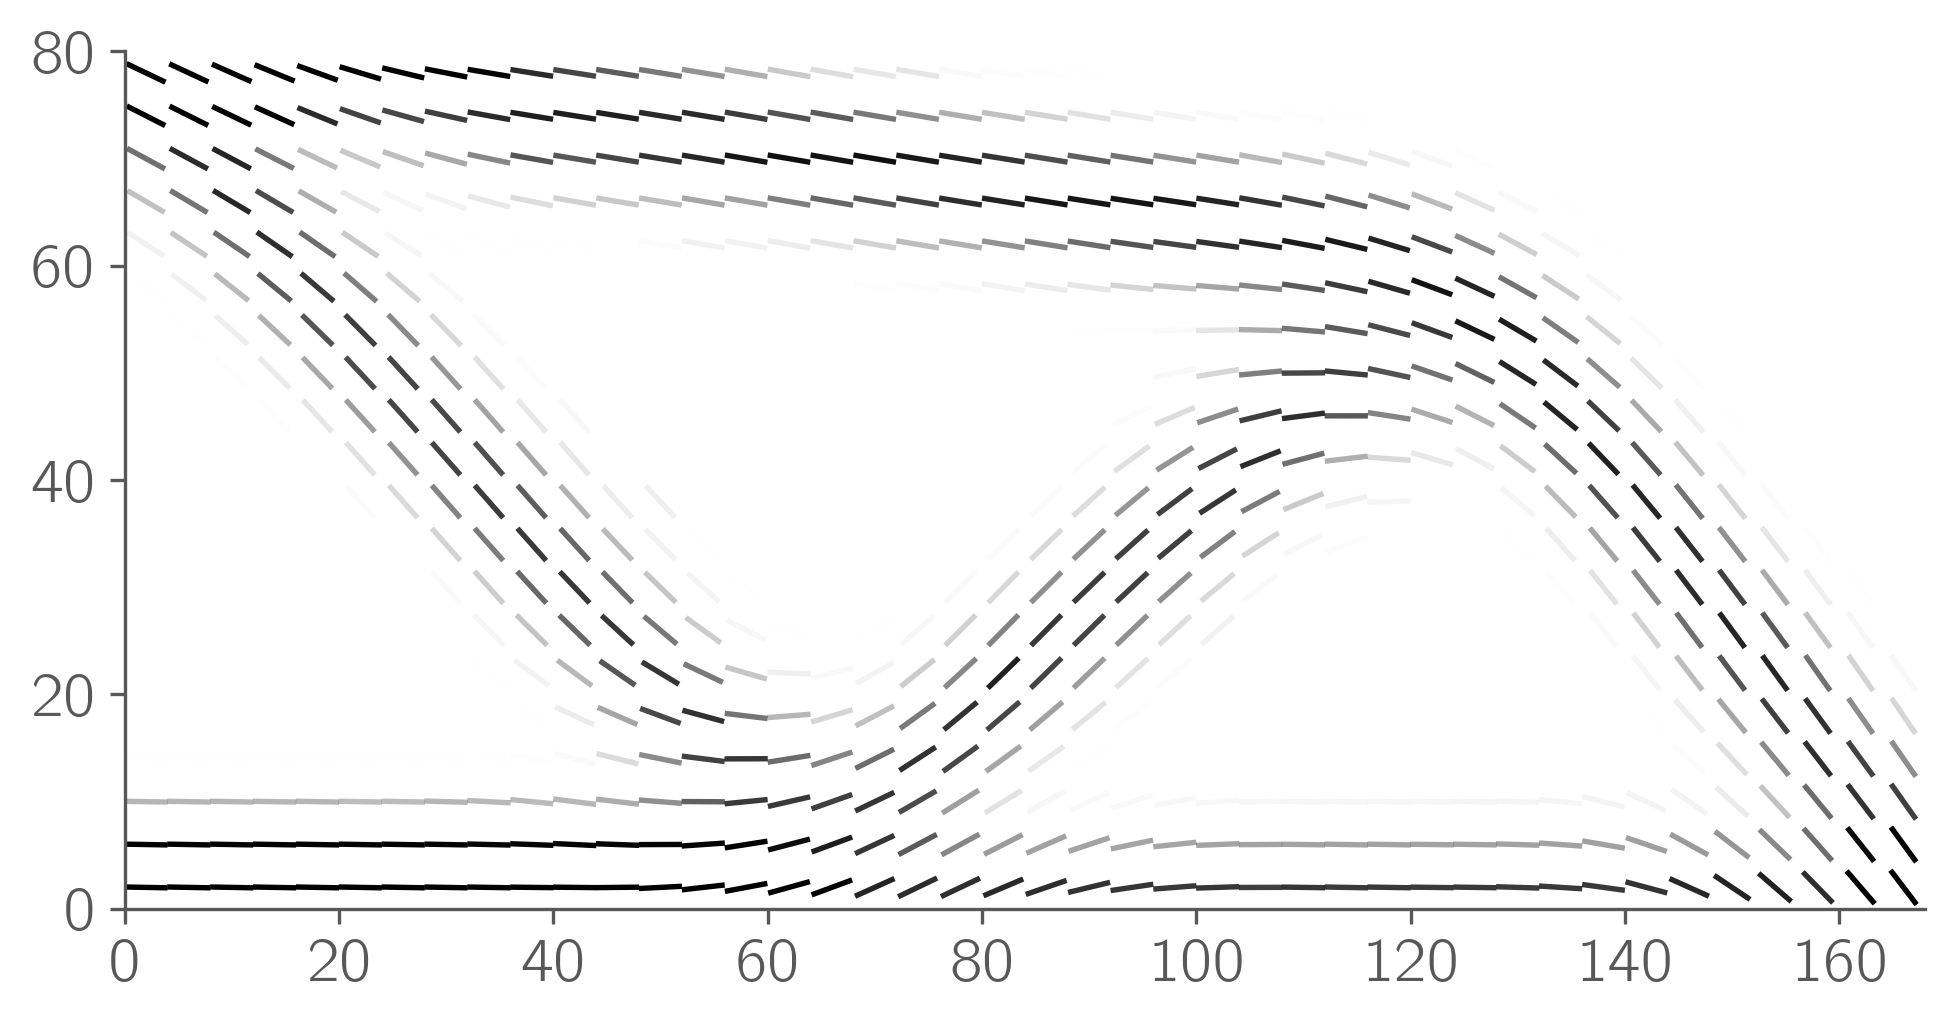

In [7]:
post2 = Post2D(solver2)
post2.plot()